In [ ]:
%pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuz
from skfuzzy import control as ctrl

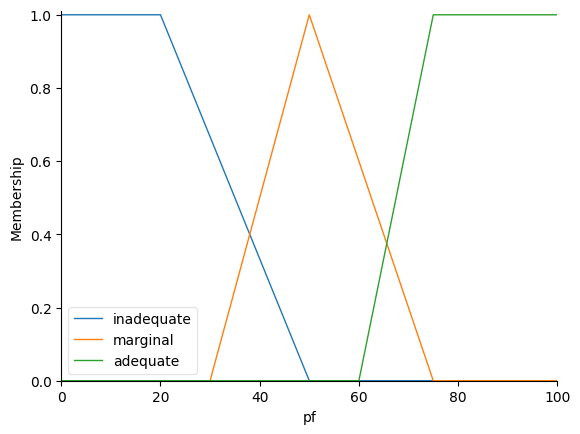

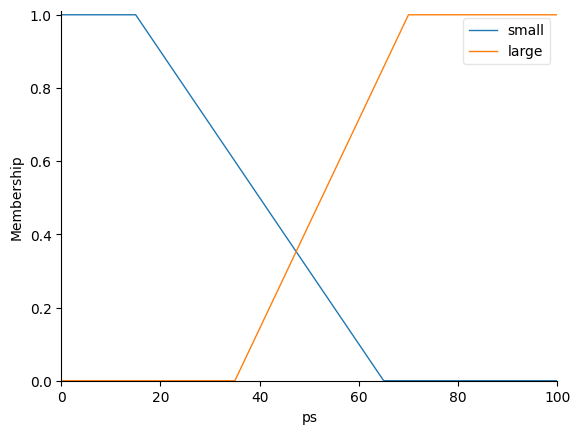

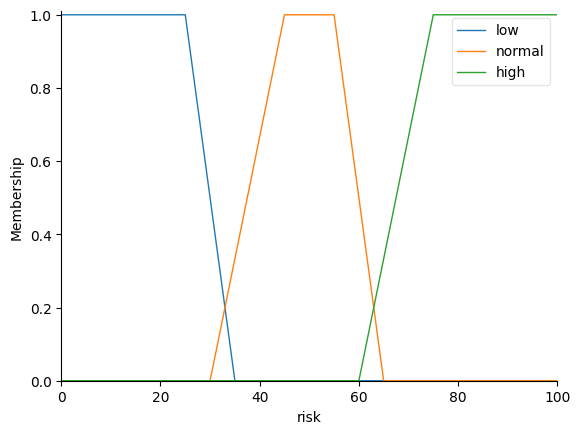

In [ ]:
pf = ctrl.Antecedent(np.arange(0,101,5), 'pf')
ps = ctrl.Antecedent(np.arange(0,101,5), 'ps')
risk = ctrl.Consequent(np.arange(0,101,5), 'risk')

pf['inadequate'] = fuz.trapmf(pf.universe, [0,0,20,50])
pf['marginal'] = fuz.trimf(pf.universe, [30,50,75])
pf['adequate'] = fuz.trapmf(pf.universe, [60,75,100, 100])

ps['small'] = fuz.trapmf(ps.universe, [0,0,15,65])
ps['large'] = fuz.trapmf(ps.universe, [35,70,100,100])

risk['low'] = fuz.trapmf(risk.universe, [0,0,25,35])
risk['normal'] = fuz.trapmf(risk.universe, [30,45,55,65])
risk['high'] = fuz.trapmf(risk.universe, [60,75,100,100])

pf.view()

ps.view()

risk.view()


In [ ]:
rule1 = ctrl.Rule(pf['adequate'] | ps['small'], risk['low'])

rule2 = ctrl.Rule(pf['marginal'] & ps['large'], risk['normal'])

rule3 = ctrl.Rule(pf['inadequate'], risk['high'])


In [ ]:
project_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
project_risk = ctrl.ControlSystemSimulation(project_ctrl)


In [ ]:
project_risk.input['pf'] = 35
project_risk.input['ps'] = 60
project_risk.compute()

print(project_risk.output['risk'])



65.42809455070372


In [ ]:
risk.viw(sim=project_risk)

NameError: name 'risk' is not defined